In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/home/fer/Documents/cfDNA/OncoprintMerge/Tumor.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df['Status'] = ['Tumor'] * len(df)
df = df.set_index('ID')
df

,UEB_0205,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0213,UEB_0214,UEB_0215,UEB_0217,UEB_0218,UEB_0219,UEB_0220,UEB_0221,UEB_0222,UEB_0223,UEB_0226,UEB_0228,Status
ID,,,,,,,,,,,,,,,,,,
AKT1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Tumor
AKT3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Tumor
AR,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,Tumor
ARHGAP35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Tumor
ARID1A,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCF7L2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Tumor
TP53,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,Tumor
U2AF1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Tumor


In [3]:
df2 = pd.read_csv('/home/fer/Documents/cfDNA/OncoprintMerge/cfDNA.csv')
df2 = df2.drop(['Unnamed: 0'], axis=1)
df2['Status'] = ['cfDNA'] * len(df)
df2 = df2.set_index('ID')
df2

,UEB_0205,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0213,UEB_0214,UEB_0215,UEB_0217,UEB_0218,UEB_0219,UEB_0220,UEB_0221,UEB_0222,UEB_0223,UEB_0226,UEB_0228,Status
ID,,,,,,,,,,,,,,,,,,
AKT1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,cfDNA
AKT3,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,cfDNA
AR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,cfDNA
ARHGAP35,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,cfDNA
ARID1A,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,cfDNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCF7L2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,cfDNA
TP53,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,1,cfDNA
U2AF1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,cfDNA


In [4]:
df_final = pd.concat([df, df2])
df_final = df_final.reset_index()
df_final = df_final.drop(['ID'], axis=1)
df_final

,UEB_0205,UEB_0208,UEB_0209,UEB_0210,UEB_0211,UEB_0213,UEB_0214,UEB_0215,UEB_0217,UEB_0218,UEB_0219,UEB_0220,UEB_0221,UEB_0222,UEB_0223,UEB_0226,UEB_0228,Status
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Tumor
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Tumor
2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,Tumor
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Tumor
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,cfDNA
164,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,1,cfDNA
165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,cfDNA
166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,cfDNA


In [5]:
lst = list(df_final.columns.values)
lst.remove('Status')
    
features = lst
x = df_final.loc[:, features].values
    
y = df_final.loc[:,['Status']].values
    
x = StandardScaler().fit_transform(x)
x

array([[-0.20851441, -0.2236068 , -0.48507125, ..., -0.20851441,
        -0.15617376, -0.26469547],
       [-0.20851441, -0.2236068 , -0.48507125, ..., -0.20851441,
        -0.15617376, -0.26469547],
       [-0.20851441, -0.2236068 , -0.48507125, ..., -0.20851441,
        -0.15617376, -0.26469547],
       ...,
       [-0.20851441, -0.2236068 , -0.48507125, ..., -0.20851441,
        -0.15617376, -0.26469547],
       [-0.20851441, -0.2236068 , -0.48507125, ..., -0.20851441,
        -0.15617376, -0.26469547],
       [-0.20851441, -0.2236068 , -0.48507125, ..., -0.20851441,
        -0.15617376, -0.26469547]])

In [6]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
    
principalDf = pd.DataFrame(data = principalComponents,
                               columns = ['PCA 1', 'PCA 2', 'PCA3'])
finalDf = pd.concat([principalDf, df_final[['Status']]], axis = 1)
finalDf

,PCA 1,PCA 2,PCA3,Status
0,-0.329056,-0.487086,-0.201137,Tumor
1,0.075742,-1.178425,0.061232,Tumor
2,-0.463855,-0.244041,1.351199,Tumor
3,0.075742,-1.178425,0.061232,Tumor
4,0.012875,-1.137678,1.454081,Tumor
...,...,...,...,...
163,-0.329056,-0.487086,-0.201137,cfDNA
164,-2.804505,5.762289,-0.361562,cfDNA
165,0.075742,-1.178425,0.061232,cfDNA
166,0.075742,-1.178425,0.061232,cfDNA


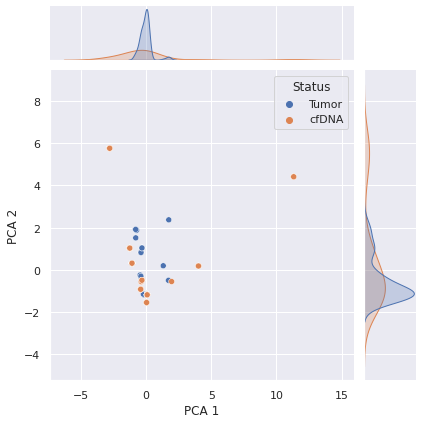

In [7]:
import seaborn as sns
sns.set_theme()
sns.jointplot(data=finalDf, x="PCA 1", y="PCA 2", hue="Status")
plt.savefig('/home/fer/PCA.pdf') 